In [1]:
# Use this to add the tag_tracking folder to python path for imports
import os, sys
tag_tracking_path = os.path.abspath(os.path.join('', './../..'))
sys.path.insert(0, tag_tracking_path)

# Import the tagsim functions
from tagsim.sim_cardiacmotion import get_random_heart
from tagsim.sim_fullmotion import get_full_motion_im

### Heart like motion simulation, modified SNR_range

High SNR example

-----------

In [20]:
tag_spacing = 8  # Tag line spacing in mm
basepath = '../image_db/' # Location of image files for background
use_gpu = True 

# Perform the data generation/simulation
res = get_random_heart(ke = 1/tag_spacing,  use_gpu = use_gpu, basepath = basepath, SNR_range=[1, 2])

# Get the final images from results
im_hi_snr = res['ims']

In [21]:
# Jupyter animation of image
import numpy as np
from torch_track.utils_anim import TagAnimator
from IPython.display import HTML

A = TagAnimator(np.squeeze(im_hi_snr), None)
HTML(A.anim.to_jshtml())

Starting animation class . . . 
Making animation . . . 


### Heart like motion simulation, modified T1_lims
Fast T1 example

-----------

In [4]:
tag_spacing = 8  # Tag line spacing in mm
basepath = '../image_db/' # Location of image files for background
use_gpu = True 

# Perform the data generation/simulation
res = get_random_heart(ke = 1/tag_spacing,  use_gpu = use_gpu, basepath = basepath, t1_lims=[100, 200], SNR_range=[50, 60])

# Get the final images from results
im_low_t1 = res['ims']

In [5]:
# Jupyter animation of image
import numpy as np
from torch_track.utils_anim import TagAnimator
from IPython.display import HTML

A = TagAnimator(np.squeeze(im_low_t1), None)
HTML(A.anim.to_jshtml())

Starting animation class . . . 
Making animation . . . 


### Heart like motion simulation, modified resolution
Lower resolution (N_im)

-----------

In [6]:
tag_spacing = 14  # Tag line spacing in mm
basepath = '../image_db/' # Location of image files for background
use_gpu = True 

# Perform the data generation/simulation
res = get_random_heart(ke = 1/tag_spacing,  use_gpu = use_gpu, basepath = basepath, N_im=128, SNR_range=[50, 60])

# Get the final images from results
im_low_res = res['ims']

In [7]:
# Jupyter animation of image
import numpy as np
from torch_track.utils_anim import TagAnimator
from IPython.display import HTML

A = TagAnimator(np.squeeze(im_low_res), None)
HTML(A.anim.to_jshtml())

Starting animation class . . . 
Making animation . . . 


### Save gifs for powerpoint
-----------

In [8]:
import matplotlib.pyplot as plt
from save_gifs import save_gif, save_gif_windows

def save_anim(im, tag):
    save_folder = './anims/{}/'.format(tag)
    os.makedirs(save_folder, exist_ok = True)

    for i_t in range(im.shape[0]):

        fig = plt.figure(figsize=[6,6])
        ax = fig.add_subplot(111)

        plt.imshow(im[i_t], cmap='gray', clim = [0,0.9*im.max()])
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)

        plt.tight_layout()

        plt.savefig('{}/frame_{:03d}.png'.format(save_folder, i_t), dpi=200, bbox_inches='tight', pad_inches=0)
        if i_t == 0:
            plt.show()
        else:
            plt.close()

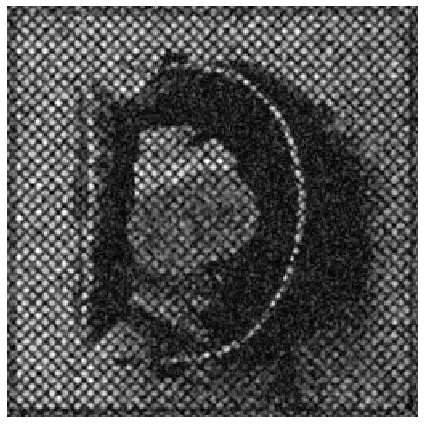

In [22]:
tag = '02_snr'
save_folder = './anims/{}/'.format(tag)
save_anim(im_hi_snr, tag)
p0 = save_gif_windows(save_folder, save_folder = './anims/', save_name = '{}.gif'.format(tag), ww=256, framerate = 16)

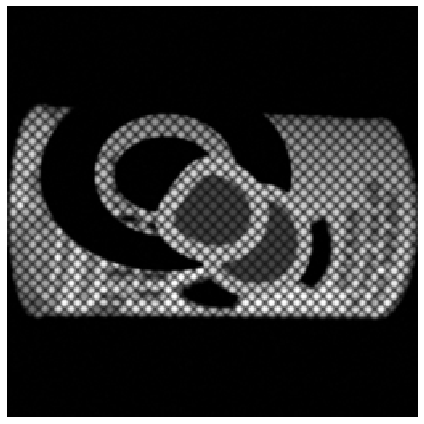

In [10]:
tag = '02_t1'
save_folder = './anims/{}/'.format(tag)
save_anim(im_low_t1, tag)
p0 = save_gif_windows(save_folder, save_folder = './anims/', save_name = '{}.gif'.format(tag), ww=256, framerate = 16)

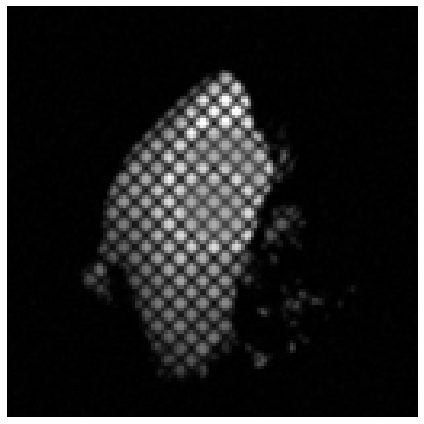

In [11]:
tag = '02_res'
save_folder = './anims/{}/'.format(tag)
save_anim(im_low_res, tag)
p0 = save_gif_windows(save_folder, save_folder = './anims/', save_name = '{}.gif'.format(tag), ww=256, framerate = 16)